# Projekt końcowy Data Science 
### Dorota Gawrońska-Popa 
## 4. c) Przykłady modeli po PCA 
(zmniejszaniu liczby wymiarów)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#import category_encoders as ce

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.ensemble import VotingRegressor

from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, recall_score

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#### wczytuję dane z poprzedniej części

In [2]:
data_dummies = pd.read_csv('data_dummies.csv')
data_dummies.drop('Unnamed: 0', axis=1, inplace=True)
data_dummies

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,5000.0,1,10.65,162.87,1,10,24000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2,15.27,59.83,2,1,30000.0,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,1,15.96,84.33,3,10,12252.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.0,1,13.49,339.31,4,10,49200.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,3000.0,2,12.69,67.79,5,1,80000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,3500.0,1,10.28,113.39,4,1,180000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,1000.0,1,9.64,32.11,14,1,12000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,2525.0,1,9.33,80.69,13,1,110000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,6500.0,1,8.38,204.84,18,1,60000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data_dummies.drop('loan_status',axis=1) 
#target
y = data_dummies['loan_status']

In [4]:
X.shape

(42535, 97)

In [5]:
y.shape

(42535,)

In [6]:
y

0        1
1        0
2        1
3        1
4        1
        ..
42530    1
42531    1
42532    1
42533    1
42534    1
Name: loan_status, Length: 42535, dtype: int64

### Standaryzacja, przed wykonaniem PCA 

In [7]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled[:5, :5]

array([[-0.82173051, -0.81456887, -0.59064503, -0.40859218, -0.76464399],
       [-1.15907367, -1.16437427,  1.69306429,  0.83739883, -1.25783589],
       [-1.1725674 , -1.17836649, -0.59064503,  1.0234884 , -1.1405688 ],
       [-0.14704418, -0.11495806, -0.59064503,  0.35734169,  0.07987056],
       [-1.09160504, -1.09441319,  1.69306429,  0.14158567, -1.21973605]])

In [8]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_mean',
       'last_fico_mean', 'fico_rating', 'loan_amnt_rating', 'interest_rating',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpo

In [9]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-0.821731,-0.814569,-0.590645,-0.408592,-0.764644,-1.532735,1.395279,-0.704226,0.795288,2.122578,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
1,-1.159074,-1.164374,1.693064,0.837399,-1.257836,-1.402702,-1.207217,-0.610611,0.795288,-1.839520,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
2,-1.172567,-1.178366,-0.590645,1.023488,-1.140569,-1.272670,1.395279,-0.887523,0.795288,-0.691775,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
3,-0.147044,-0.114958,-0.590645,0.357342,0.079871,-1.142637,1.395279,-0.311045,0.795288,0.985240,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
4,-1.091605,-1.094413,1.693064,0.141586,-1.219736,-1.012604,-1.207217,0.169509,0.795288,0.678977,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,-1.024136,-1.024452,-0.590645,-0.508379,-1.001476,-1.142637,-1.207217,1.729751,-3.343908,-0.501476,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42531,-1.361480,-1.374258,-0.590645,-0.680984,-1.390515,0.157690,-1.207217,-0.891455,-3.343908,-0.501476,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42532,-1.155700,-1.160876,-0.590645,-0.764590,-1.157991,0.027657,-1.207217,0.637582,-3.343908,-0.501476,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42533,-0.619325,-0.604686,-0.590645,-1.020800,-0.563758,0.677821,-1.207217,-0.142539,-3.343908,-1.393505,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272


#### Sprawdzamy korelację 

In [10]:
plt.figure(figsize = (20,10))       
X_scaled_df.corr()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
loan_amnt,1.000000,0.981746,0.355647,0.292346,0.930869,0.119626,0.138589,0.276125,0.142493,0.065112,...,-0.007118,-0.011793,0.017900,0.000111,0.010004,-0.010225,-0.003873,0.000184,-0.003483,0.000242
funded_amnt,0.981746,1.000000,0.335137,0.295154,0.956522,0.115749,0.138117,0.272070,0.152112,0.064821,...,-0.006992,-0.015116,0.016872,0.000063,0.011842,-0.010569,-0.002099,0.000458,-0.002075,0.000828
term,0.355647,0.335137,1.000000,0.428649,0.097614,0.190461,0.111158,0.043496,0.281890,0.077059,...,0.003617,-0.016207,-0.011033,0.002065,0.002166,-0.004024,-0.007010,0.011548,0.005385,-0.006537
int_rate,0.292346,0.295154,0.428649,1.000000,0.271433,0.313232,-0.012695,0.054377,0.006153,0.119607,...,-0.006738,-0.001938,0.002413,0.000201,0.005777,-0.008556,0.006209,0.000731,-0.005369,0.005543
installment,0.930869,0.956522,0.097614,0.271433,1.000000,0.102561,0.108253,0.278342,0.072136,0.054948,...,-0.009050,-0.012582,0.020323,-0.000956,0.010888,-0.009995,0.000584,-0.002843,-0.005191,0.003201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
addr_state_VT,-0.010225,-0.010569,-0.004024,-0.008556,-0.009995,-0.000909,0.005953,-0.008894,0.002532,-0.000426,...,-0.001455,-0.001005,-0.009936,-0.002971,-0.006972,1.000000,-0.005349,-0.004059,-0.002434,-0.001658
addr_state_WA,-0.003873,-0.002099,-0.007010,0.006209,0.000584,-0.000473,0.000559,-0.005645,0.003483,-0.002305,...,-0.005800,-0.004007,-0.039607,-0.011844,-0.027792,-0.005349,1.000000,-0.016181,-0.009703,-0.006611
addr_state_WI,0.000184,0.000458,0.011548,0.000731,-0.002843,0.000552,0.009861,-0.010436,-0.006541,0.003232,...,-0.004402,-0.003041,-0.030058,-0.008988,-0.021092,-0.004059,-0.016181,1.000000,-0.007364,-0.005017
addr_state_WV,-0.003483,-0.002075,0.005385,-0.005369,-0.005191,-0.009206,0.011335,-0.015449,0.006883,0.018204,...,-0.002639,-0.001823,-0.018025,-0.005390,-0.012648,-0.002434,-0.009703,-0.007364,1.000000,-0.003008


<Figure size 1440x720 with 0 Axes>

### PCA redukcja wymiarów

In [11]:
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(random_state=42)

#### Sprawdzam liczbę komponentów

In [12]:
pca.components_[0]

array([ 3.98663613e-01,  3.97415860e-01,  1.75253811e-01,  1.49808078e-01,
        3.73623051e-01,  7.26308430e-02,  1.17359348e-01,  1.68026467e-01,
        9.01326971e-02,  7.89990740e-02, -3.45799486e-03, -1.47489234e-01,
        1.22166090e-03,  1.76536828e-02,  1.60700550e-01, -1.27456455e-02,
        1.76637691e-01,  6.06719717e-02,  2.05562709e-01, -5.02451223e-03,
        2.92654586e-02,  3.51002763e-02, -1.29941452e-02,  3.57000230e-01,
       -3.56261233e-02,  1.63683343e-01, -7.86086491e-03, -7.53057314e-03,
       -2.19799777e-02, -1.50166856e-01, -1.87402351e-01, -3.67182189e-02,
        2.33837977e-01, -5.60760418e-02,  1.36321709e-02,  9.87598382e-02,
       -3.97916297e-02,  2.40204415e-02,  3.01376786e-03, -5.63334818e-02,
       -2.37687289e-02, -4.33795388e-02, -7.96720393e-02, -3.64677788e-03,
        3.17435180e-02, -3.37189468e-02, -2.37466492e-02,  7.47535356e-03,
        5.00539201e-03,  7.64054869e-04,  1.22576842e-03, -6.36342295e-03,
       -4.73190966e-04,  

In [13]:
pca.explained_variance_ratio_

array([5.36600393e-02, 3.33538833e-02, 2.46932832e-02, 1.99650149e-02,
       1.89639579e-02, 1.76088981e-02, 1.55906721e-02, 1.46576546e-02,
       1.42656015e-02, 1.32954042e-02, 1.29603083e-02, 1.25189207e-02,
       1.21724170e-02, 1.17997133e-02, 1.15013606e-02, 1.13861075e-02,
       1.12913340e-02, 1.11791430e-02, 1.11144655e-02, 1.10909198e-02,
       1.09967637e-02, 1.09566878e-02, 1.08591267e-02, 1.08375646e-02,
       1.07571345e-02, 1.07411810e-02, 1.06999495e-02, 1.06931807e-02,
       1.06807625e-02, 1.06634483e-02, 1.06375786e-02, 1.06205350e-02,
       1.05754055e-02, 1.05522768e-02, 1.05331589e-02, 1.05221234e-02,
       1.05001026e-02, 1.04931010e-02, 1.04708469e-02, 1.04663513e-02,
       1.04490882e-02, 1.04345887e-02, 1.04224166e-02, 1.04122505e-02,
       1.04053309e-02, 1.04007455e-02, 1.03892348e-02, 1.03844509e-02,
       1.03712557e-02, 1.03644878e-02, 1.03592249e-02, 1.03544839e-02,
       1.03482132e-02, 1.03388644e-02, 1.03295674e-02, 1.03261227e-02,
      

#### Skumulowana suma wariancji

In [14]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.05366004, 0.08701392, 0.11170721, 0.13167222, 0.15063618,
       0.16824508, 0.18383575, 0.1984934 , 0.21275901, 0.22605441,
       0.23901472, 0.25153364, 0.26370606, 0.27550577, 0.28700713,
       0.29839324, 0.30968457, 0.32086371, 0.33197818, 0.3430691 ,
       0.35406586, 0.36502255, 0.37588168, 0.38671924, 0.39747638,
       0.40821756, 0.41891751, 0.42961069, 0.44029145, 0.4509549 ,
       0.46159248, 0.47221301, 0.48278842, 0.49334069, 0.50387385,
       0.51439598, 0.52489608, 0.53538918, 0.54586003, 0.55632638,
       0.56677547, 0.57721006, 0.58763247, 0.59804472, 0.60845005,
       0.6188508 , 0.62924003, 0.63962448, 0.64999574, 0.66036023,
       0.67071945, 0.68107394, 0.69142215, 0.70176101, 0.71209058,
       0.7224167 , 0.73273331, 0.74304427, 0.75334845, 0.76362239,
       0.77388627, 0.78414518, 0.79437941, 0.80458259, 0.81474804,
       0.82484872, 0.834918  , 0.84497445, 0.8550121 , 0.86501474,
       0.87494113, 0.88473625, 0.89446793, 0.90409374, 0.91339

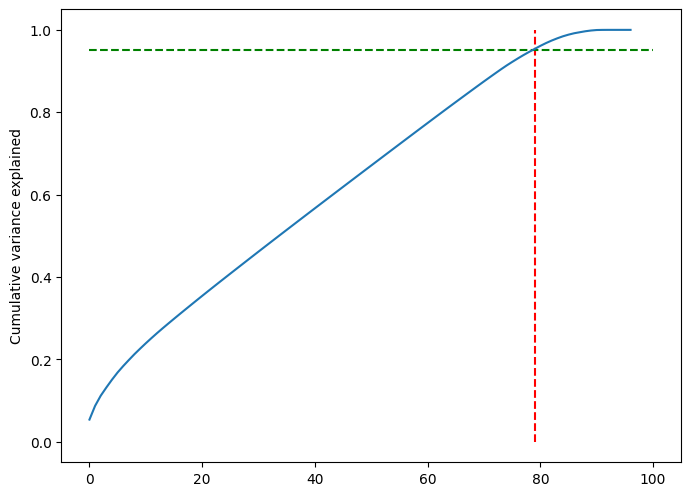

In [15]:
fig = plt.figure(figsize=[8,6],dpi=100)
plt.vlines(x=79, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Mamy 79 komponentów, 
przy których zachowujemy 95% pierwotnych danych. Budujemy nowe dane. 79 komponentów to ponad 81% wszystkich, co prawdopodobnie nie da wielkiej zmiany. Przyjęłam do obliczeń różne wartości komponentów:
- n_components=2 => AUROC LG = 0.7975915
- n_components=20 => AUROC LG = 0.737982
- n_components=30 => AUROC LG = 0.743456
- n_components=50 => AUROC LG = 0.730057
- n_components=79 => AUROC LG = 0.758493

Najwyższe wartości są dla skrajnych liczb komponentów n=2 i n=79. Sprawdzam dla różnych n, i ostatecznie wybieram na po analizie.  

In [16]:
pca_final = PCA(n_components=60, random_state=67)
X_pca_final = pca_final.fit_transform(X_scaled)

In [17]:
print(X.shape)
print(X_pca_final.shape)

(42535, 97)
(42535, 60)


In [18]:
X = X_pca_final
y = data_dummies['loan_status']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test 

array([[-1.13915721, -0.78008089, -0.549711  , ..., -0.30889461,
        -0.26340202, -2.37898625],
       [-1.30916994,  0.02361284,  0.2034459 , ..., -0.1966055 ,
        -0.40182079,  0.52121232],
       [-0.12324974,  1.13157697,  0.62666237, ...,  0.55362987,
         0.53596514,  0.30089312],
       ...,
       [ 0.3790809 ,  1.47120904, -0.55698086, ..., -0.16396143,
         0.79168164,  0.4471615 ],
       [ 0.87702519, -1.55075332, -1.01377858, ...,  0.31099657,
        -0.42649259, -0.55116541],
       [ 0.28118921, -0.2912634 ,  2.36675704, ..., -0.66702674,
        -0.11695606,  0.7017783 ]])

In [21]:
y_test.sample()

12060    0
Name: loan_status, dtype: int64

### Logistic Regression

In [22]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_pred = log.predict(X_test)
    
# Summary of the prediction
print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

# Accuracy
print('Training accuracy:', log.score(X_train, y_train))
print('Test accuracy:', log.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.65      0.09      0.16      1978
           1       0.86      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.75      0.54      0.54     12761
weighted avg       0.82      0.85      0.80     12761

[[  185  1793]
 [  101 10682]]
Training accuracy: 0.8556794518707598
Test accuracy: 0.8515790298565943


In [23]:
auroc_log = roc_auc_score(log_pred,y_test)
print('AUROC =', auroc_log)

AUROC = 0.7515628459716636


### Logistic Regression z regularyzacją

In [24]:
log1 = LogisticRegression(penalty='l1', C=.01, solver='liblinear')
log1.fit(X_train, y_train)
log1_pred = log1.predict(X_test)

# Summary of the prediction
print(classification_report(y_test, log1_pred))
print(confusion_matrix(y_test, log1_pred))

# Accuracy
print('Training accuracy:', log1.score(X_train, y_train))
print('Test accuracy:', log1.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.70      0.06      0.10      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.78      0.53      0.51     12761
weighted avg       0.83      0.85      0.79     12761

[[  112  1866]
 [   48 10735]]
Training accuracy: 0.8535970981393162
Test accuracy: 0.8500117545646892


In [25]:
auroc_log1 = roc_auc_score(log1_pred,y_test)
print('AUROC =', auroc_log1)

AUROC = 0.7759582572811682


#### Uwaga 
Wyniki ewaluacji LR z regularyzacją wyszły lepsze po ponownym skalowanie nowych danych. 

In [26]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

### Random Forest Classifier

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
rf_prediction = rf.predict(X_test)

In [30]:
rf_pr = evaluate(rf_prediction,y_test)
rf_pr

# Summary of the prediction
print(classification_report(y_test, rf_prediction))
print(confusion_matrix(y_test, rf_prediction))
# Accuracy
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.64      0.05      0.09      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.75      0.52      0.50     12761
weighted avg       0.82      0.85      0.79     12761

[[   96  1882]
 [   54 10729]]
Training accuracy: 0.9999664136494928
Test accuracy: 0.8482877517435937


In [31]:
auroc_rf = roc_auc_score(rf_prediction,y_test)
print(auroc_rf)

0.7453826024898899


### K Nearest Neighbors (KNN)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
knn_prediction = knn.predict(X_test)

In [36]:
knn_pr = evaluate(knn_prediction,y_test)
knn_pr
# Summary of the prediction
print(classification_report(y_test, knn_prediction))
print(confusion_matrix(y_test, knn_prediction))
# Accuracy
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.31      0.07      0.11      1978
           1       0.85      0.97      0.91     10783

    accuracy                           0.83     12761
   macro avg       0.58      0.52      0.51     12761
weighted avg       0.77      0.83      0.78     12761

[[  139  1839]
 [  305 10478]]
Training accuracy: 0.8683750923624639
Test accuracy: 0.8319880887077815


In [37]:
auroc_knn = roc_auc_score(knn_prediction,y_test)
print('AUROC =', auroc_knn)

AUROC = 0.5818786128013212


### Bagging Classifier

In [38]:
xgbc = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
xgbc.fit(X_train,y_train)
xgbc_prediction = xgbc.predict(X_test)

xgbc = evaluate(xgbc_prediction,y_test)
xgbc

# Summary of the prediction
print(classification_report(y_test, xgbc_prediction))
print(confusion_matrix(y_test, xgbc_prediction))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25      1978
           1       0.86      0.95      0.90     10783

    accuracy                           0.83     12761
   macro avg       0.63      0.57      0.58     12761
weighted avg       0.79      0.83      0.80     12761

[[  364  1614]
 [  577 10206]]


In [39]:
auroc_xgbc = roc_auc_score(xgbc_prediction,y_test)
print('AUROC =', auroc_xgbc)

AUROC = 0.6251371529369878


### ADA Boost Classifier 

In [40]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(X_train, y_train)
ada_prediction = ada.predict(X_test)
print(classification_report(y_test, ada_prediction))
ada = evaluate(ada_prediction,y_test)
ada

# Summary of the prediction
print(classification_report(y_test, ada_prediction))
print(confusion_matrix(y_test, ada_prediction))

              precision    recall  f1-score   support

           0       0.54      0.12      0.19      1978
           1       0.86      0.98      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.70      0.55      0.55     12761
weighted avg       0.81      0.85      0.80     12761

              precision    recall  f1-score   support

           0       0.54      0.12      0.19      1978
           1       0.86      0.98      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.70      0.55      0.55     12761
weighted avg       0.81      0.85      0.80     12761

[[  233  1745]
 [  202 10581]]


In [41]:
auroc_ada = roc_auc_score(ada_prediction,y_test)
print('AUROC =', auroc_ada)

AUROC = 0.6970307601351037


### XGB Classifier

In [42]:
import xgboost as xgb 
xgb_clas=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb_clas.fit(X_train, y_train)
xgb_clas_prediction = xgb_clas.predict(X_test)
xgb_clas = evaluate(xgb_clas_prediction,y_test)
xgb_clas

# Summary of the prediction
print(classification_report(y_test, xgb_clas_prediction))
print(confusion_matrix(y_test, xgb_clas_prediction))

              precision    recall  f1-score   support

           0       0.61      0.03      0.06      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.73      0.51      0.49     12761
weighted avg       0.81      0.85      0.78     12761

[[   61  1917]
 [   39 10744]]


In [43]:
auroc_xgb_clas = roc_auc_score(xgb_clas_prediction,y_test)
print('AUROC =', auroc_xgb_clas)

AUROC = 0.7292950793776163


#### Nie liczy AUROC po PCA 

### Support Vector Machine (SVM)

In [44]:
#supvm = SVC(C=1.0, kernel='linear', random_state = 12)

In [45]:
#supvm.fit(X_train,y_train)

In [46]:
#svm_prediction = supvm.predict(X_test)

In [47]:
# svm_pr = evaluate(svm_prediction,y_test)
# svm_pr
# # Summary of the prediction
# print(classification_report(y_test, svm_prediction))
# print(confusion_matrix(y_test, svm_prediction))

# # Accuracy
# print('Training accuracy:', supvm.score(X_train, y_train))
# print('Test accuracy:', supvm.score(X_test, y_test))

#### Nie liczy AUROC po PCA 
### Decision Tree

In [48]:
#dtree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [49]:
#dtree.fit(X_train,y_train)

In [50]:
#dt_pred = dtree.predict(X_test)

In [51]:
# dtree_pr = evaluate(dt_prediction,y_test)
# dtree_pr

# # Summary of the prediction
# print(classification_report(y_test, dt_pred))
# print(confusion_matrix(y_test, dt_pred))
# # Accuracy
# print('Training accuracy:', dtree.score(X_train, y_train))
# print('Test accuracy:', dtree.score(X_test, y_test))
# # metrics.f1_score(y_test, dt_pred, average='weighted', labels=np.unique(dt_pred))

# # import warnings
# # warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [52]:
# auroc_dtree = roc_auc_score(dt_prediction,y_test)
# print('AUROC =', auroc_dtree)
# metrics.f1_score(y_test, dt_prediction, average='weighted', labels=np.unique(dt_prediction))

#### Nie liczy AUROC po PCA 
### Gradient Boosting Classifier

In [53]:
# gbc = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
# gbc.fit(X_train, y_train)
# gbc_predpca = gbc.predict(X_test)
# # gbc = evaluate(gbc_predpca,y_test)
# gbc

# # Summary of the prediction
# print(classification_report(y_test, gbc_predpca))
# print(confusion_matrix(y_test, gbc_predpca))

In [54]:
# auroc_gbc = roc_auc_score(gbc_predpca,y_test)
# print('AUROC =', gbc_predpca)

## 4. d) Finalny model 
### Analiza

Po wykonaniu PCA i skalowaniu danych wyniki AUROC dla większości modeli były niższe niż przed wykonaniem PCA. Ponadto w przypadku kilka modeli, nie dało się ich wdrożyć po kompresji danych za pomocą PCA. 

Sprawdzałam działanie wszystkich powyższych modeli na różnych wartościach komponentów n=2, n=30, n=60 i n=79. Najbardziej wrażliwy na zmianę liczby komponentów okazał się algorytm 'Logistic Regression (z regularyzacją)', który miał dla odpowiedniej liczby komponentów następujace wyniki:
- n_components=2 => AUROC LG = 0.922531 (wartość odstająca, przy pewnym random_forest)
- n_components=30 => AUROC LG = 0.766530
- n_components=60 => AUROC LG = 0.775958
- n_components=79 => AUROC LG = 0.763670

Z modeli bez kompresji PCA najlepszy okazał się Gradient Boosting Classifier, który miał
- AUROC GBC = 0.830432

### Finalny model
### Gradient Boosting Classifier
Ten model wybieram jako finalny, poniżej zrobię krosswalidację i ...!!!!!

In [55]:
X1 = data_dummies.drop('loan_status',axis=1) 
#target
y1 = data_dummies['loan_status']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [56]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
X1_test

array([[-0.95313026, -0.95140853, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [-1.22287358, -1.23096153, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.31891988, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       ...,
       [ 0.28768898,  0.33453524, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.66532962,  0.72590943,  1.68415002, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299,  0.16680344, -0.59377133, ..., -0.10937932,
        -0.06622215, -0.0456804 ]])

In [57]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc.fit(X1_train, y1_train)
gbc_prediction = gbc.predict(X1_test)
gbc = evaluate(gbc_prediction,y1_test)
gbc

# Summary of the prediction
print(classification_report(y1_test, gbc_prediction))
print(confusion_matrix(y1_test, gbc_prediction))

              precision    recall  f1-score   support

           0       0.81      0.06      0.10      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.53      0.51     12761
weighted avg       0.85      0.85      0.79     12761

[[  110  1868]
 [   26 10757]]


In [58]:
auroc_gbc = roc_auc_score(gbc_prediction,y1_test)
print('AUROC =', auroc_gbc)

AUROC = 0.8304315666860803


In [59]:
## żródło: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [60]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

<Figure size 1440x1008 with 0 Axes>

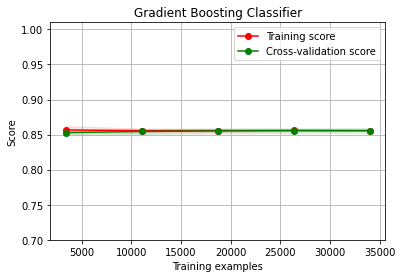

In [61]:
gbc = GradientBoostingClassifier(learning_rate=0.01, random_state=1)
plt.figure(figsize=(20,14))
plot_learning_curve(gbc, 'Gradient Boosting Classifier', X1, y1, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [62]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gbc,X1, y1, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.8557662777909454
Standard Deviation:  0.0352216027446583


#### Zapisywanie modelu na dysku

In [63]:
import pickle

# save the model to disk
gbc_final_model = 'finalized_model.sav'
pickle.dump(gbc, open(gbc_final_model, 'wb'))

### Łódź 4.10.2020